w1 = 0.6039366864156861, b = -47.35307400245374, MSE_train = 0.06441155041002307 sau 672 vòng lặp
rate train is:  100.0 %


C:\Users\Admin\AppData\Local\Temp\ipykernel_13756\2074738845.py:19: RuntimeWarning: overflow encountered in exp
  a = 1/(1+np.exp(-g))
C:\Users\Admin\AppData\Local\Temp\ipykernel_13756\2074738845.py:22: RuntimeWarning: divide by zero encountered in log
  x = np.log(sigmoid_result)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13756\2074738845.py:24: RuntimeWarning: invalid value encountered in multiply
  a = -(y)*x - (1-y)*x1
C:\Users\Admin\AppData\Local\Temp\ipykernel_13756\2074738845.py:23: RuntimeWarning: divide by zero encountered in log
  x1 = np.log(1 - sigmoid_result)


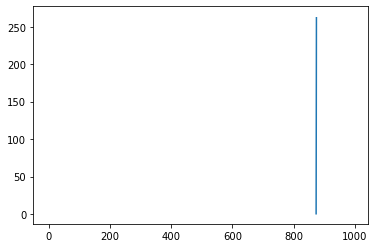

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

# prepare datate
X = np.array([50, 60, 61, 65, 70, 75, 80, 81, 88, 90])
X = X.reshape(-1, 1)
one_b = np.ones((X.shape[0], 1))
X = np.concatenate((X, one_b), axis = 1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
y = y.reshape(-1,1)
# function
def g_function(X, w_b):
    return X.dot(w_b.reshape(-1, 1)); # (z) mảng w_b ban đầu là mảng 1 chiều dùng reshape để chuyên về nhiều hàng 1 cột, để nhân có hướng với X

def sigmoid(g): # g = w*x + b
    a = 1/(1+np.exp(-g))
    return a
def Loss_function(y, sigmoid_result):
    x = np.log(sigmoid_result)
    x1 = np.log(1 - sigmoid_result)
    a = -(y)*x - (1-y)*x1
    return np.mean(a)
    
def derivative_Loss_wb(X, y, y_predict): 
    a = (y_predict - y)*X
    return np.mean(a, axis=0);
def value_final(y_predict, bound):
    for i in range(0, y_predict.shape[0]):
        if (y_predict[i] > bound):
            y_predict[i] = 1
        else:
            y_predict[i] = 0
    return y_predict
def accurate_rate(y_predict, y):
    count = 0
    for i in range(0, y_predict.shape[0]):
        if (y_predict[i] == y[i]):
            count = count+1
    return count/y_predict.shape[0]*100
    
w1 = 0.03; b = 0.05
stored = []; MSE = [];
u = 1;
bound = 0.5
for i in range(0, 1000):
    w_b = np.array([w1, b])
    g = g_function(X, w_b)
    y_predict = sigmoid(g)
    stored.append(w_b.copy());
    MSE.append(Loss_function(y, y_predict))
    derivate_MSE = derivative_Loss_wb(X, y, y_predict)
    w1 = w1 - u*derivate_MSE[0];
    b = b - u*derivate_MSE[1];
w_b = stored[MSE.index(min(MSE))]
w1, b = w_b
print("w1 = {0}, b = {1}, MSE_train = {2} sau {3} vòng lặp".format(w1, b, min(MSE), (MSE.index(min(MSE)) + 1)))
plt.plot(MSE)
g = g_function(X, w_b)
y_predict = sigmoid(g)
y_final = value_final(y_predict, bound)
percent = accurate_rate(y_predict, y)
print("rate train is: ", percent, "%")

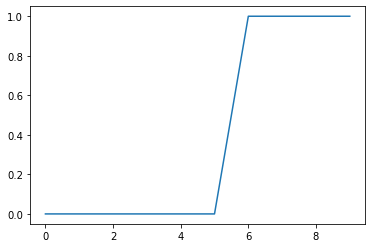

In [13]:
plt.plot(y_predict)


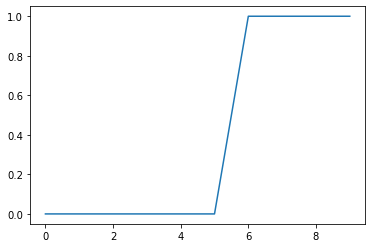

In [14]:
plt.plot(y)

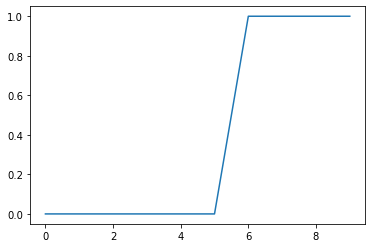

In [15]:
plt.plot(y_final)

In [17]:
MSE[671]

0.06441155041002307